In [19]:
import math
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder 
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode
from scipy.cluster.hierarchy import linkage, dendrogram
from collections import Counter
from scipy import stats
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/marioproia/Progetto_DM1/master/df.csv?token=ANVE7JPCOLZHGHDKT4TT4KS7V23N6")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager,TWYears_zscore,YearsAtCompany_zscore,YearsInCurrentRole_zscore,YearsWithCurrManager_zscore,YearsSinceLastPromotion_zscore,Cluster
0,27.0,Yes,1,Sales,Far,2,Medical,59,1,1,...,2.0,2,2,2,-0.563330,-0.800946,-0.624962,-0.604525,-0.063256,0
1,30.0,Yes,2,Sales,Far,4,Marketing,70,1,1,...,8.0,0,0,0,-0.176129,0.739024,-1.177748,-1.165773,-0.682655,0
2,56.0,No,0,Research & Development,Near,4,Technical Degree,60,4,1,...,12.0,1,3,4,0.082005,1.765670,-0.348570,-0.043277,-0.372956,2
3,41.0,Yes,2,Human Resources,Far,5,Human Resources,89,4,1,...,2.0,0,0,0,-1.208665,-0.800946,-1.177748,-1.165773,-0.682655,2
4,42.0,No,2,Research & Development,Near,3,Life Sciences,76,4,1,...,5.0,1,3,0,0.082005,-0.030961,-0.348570,-1.165773,-0.372956,0


# HIERARCHICAL CLUSTERING

In [2]:
clustering = df[["Age", "MonthlyIncome", "HourlyRate"]]
clustering.head()

,Age,MonthlyIncome,HourlyRate
0,27.0,4298.0,59
1,30.0,5304.0,70
2,56.0,6306.0,60
3,41.0,6430.0,89
4,42.0,2766.0,76


In [3]:
# hierarchical clustering: y_axis=distance or dissimilarity between clusters, x_axis=objects and clusters
#Cards that join together sooner are more similar to each other than those that join together later
connectivity = kneighbors_graph(clustering, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [4]:
scaler = RobustScaler()
X = scaler.fit_transform(clustering.values)
scaler.transform(clustering.values)

array([[-0.9195693 , -0.17168356, -0.19444444],
       [-0.64684203,  0.13265769,  0.11111111],
       [ 1.71679433,  0.43578884, -0.16666667],
       ...,
       [ 0.0804307 ,  0.14445621,  0.66666667],
       [-0.01047839, -0.83209802,  0.83333333],
       [-0.37411476,  0.0851611 ,  0.27777778]])

In [5]:
print('Ward')
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(clustering)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('Labels: ', dict(zip(bins, hist)))
print('Silhouette: ', silhouette_score(clustering, ward.labels_))

Ward
Labels:  {0: 681, 1: 168, 2: 104, 3: 335, 4: 117, 5: 54}
Silhouette:  0.6398323070543716


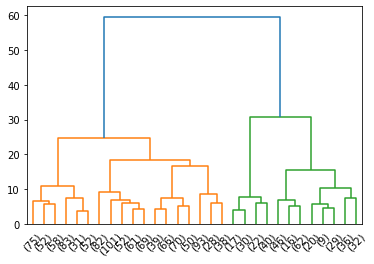

In [17]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode="lastp")

In [7]:
print('Average linkage')
average_linkage = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='manhattan', connectivity=connectivity)
average_linkage.fit(clustering)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print('Labels: ', dict(zip(bins, hist)))
print('Silhouette: ', silhouette_score(clustering, average_linkage.labels_))

Average linkage
Labels:  {0: 1284, 1: 46, 2: 54, 3: 50, 4: 6, 5: 19}
Silhouette:  0.5942718065496041


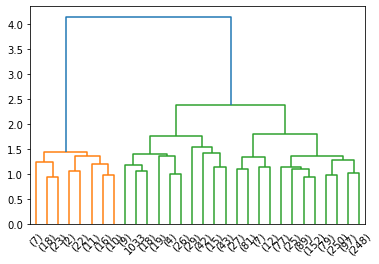

In [8]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode="lastp")

In [9]:
print('Complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='l1',
                                              connectivity=connectivity)
complete_linkage.fit(clustering)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print('Labels: ', dict(zip(bins, hist)))
print('Silhouette: ', silhouette_score(clustering, complete_linkage.labels_))

Complete linkage
Labels:  {0: 49, 1: 37, 2: 1284, 3: 46, 4: 22, 5: 21}
Silhouette:  0.5983235932434062


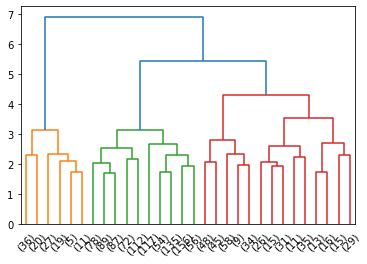

In [10]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode="lastp")

In [11]:
print('Single')
ward = AgglomerativeClustering(n_clusters=6, linkage='single', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(clustering)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('Labels: ', dict(zip(bins, hist)))
print('Silhouette: ', silhouette_score(clustering, ward.labels_))

Single
Labels:  {0: 3, 1: 104, 2: 46, 3: 3, 4: 1301, 5: 2}
Silhouette:  0.5748113675336735


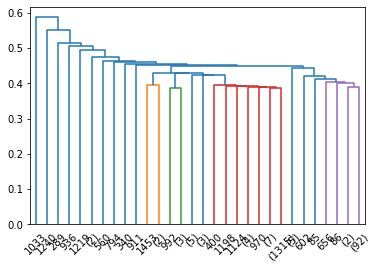

In [12]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode="lastp")